<a href="https://colab.research.google.com/github/marciogsantana/engenharia_machine_learning/blob/main/trabalho_pratico3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Prático Módulo 3

Bootcamp Engenheiro de Machine Learning @ IGTI

Objetivos:
*   Exercitar conceitos sobre medidas de desempenho para regressão.
*   Modelar um problema como uma tarefa de regressão.
*   Avaliar um modelo de regressão.
*   Exercitar conceitos sobre medidas de desempenho para classificação.
*   Modelar um problema como uma tarefa de classificação.
*   Avaliar um modelo de classificação.
*   Exercitar conceitos sobre medidas de desempenho para clusterização.
*   Modelar um problema como uma tarefa de clusterização.
*   Avaliar um modelo de clustering.

## Importação

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Regression task com regressão linear
diabetes = pd.read_csv('/content/drive/MyDrive/01 - Data Science/bootcamp engenheiro de ml/modulo 3 - selecao de modelos de aprendizado de maquina/trabalho pratico modulo 3/diabetes_numeric.csv')

#Classification task com SVM
bloodtransf = pd.read_csv('/content/drive/MyDrive/01 - Data Science/bootcamp engenheiro de ml/modulo 3 - selecao de modelos de aprendizado de maquina/trabalho pratico modulo 3/bloodtransf.csv')

#Cluster task com KMeans
wine = pd.read_csv('/content/drive/MyDrive/01 - Data Science/bootcamp engenheiro de ml/modulo 3 - selecao de modelos de aprendizado de maquina/trabalho pratico modulo 3/wine.csv')

In [ ]:
#Modelos
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC #com kernel=rbf

from sklearn.model_selection import train_test_split #test_size = 0.35 e random_state = 54

In [ ]:
diabetes.head()

,age,deficit,c_peptide
0,5.2,-8.1,4.8
1,8.8,-16.1,4.1
2,10.5,-0.9,5.2
3,10.6,-7.8,5.5
4,10.4,-29.0,5.0


In [ ]:
bloodtransf.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [ ]:
wine.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#Metricas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, silhouette_score, davies_bouldin_score, mutual_info_score

## Perguntas

In [ ]:
# Sobre o número de atributos da base de regressão, marque a alternativa CORRETA:
diabetes.shape

(43, 3)

In [ ]:
# Sobre o número de instâncias da base de classificação, marque a alternativa CORRETA:
bloodtransf.shape

(748, 5)

In [ ]:
# Sobre a base de clusterização, marque a alternativa CORRETA:
wine.shape

(178, 14)

In [ ]:
wine['class'].unique()

array([1, 2, 3])

In [ ]:
#Sobre dados faltantes, marque a alternativa CORRETA:

In [ ]:
diabetes.isnull().sum()

age          0
deficit      0
c_peptide    0
dtype: int64

In [ ]:
bloodtransf.isnull().sum()

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64

In [ ]:
wine.isnull().sum()

class                             0
Alcohol                           0
Malic_acid                        0
Ash                               0
Alcalinity_of_ash                 0
Magnesium                         0
Total_phenols                     0
Flavanoids                        0
Nonflavanoid_phenols              0
Proanthocyanins                   0
Color_intensity                   0
Hue                               0
OD280%2FOD315_of_diluted_wines    0
Proline                           0
dtype: int64

In [ ]:
# Em relação a modelagem utilizando a regressão linear, marque a alternativa CORRETA sobre a métrica r2, MAE e MSE: 

x_diabetes = diabetes.drop('c_peptide', axis=1)
x_diabetes = np.array(x_diabetes)
y_diabetes = np.array(diabetes['c_peptide'])

x_treino_diabetes, x_teste_diabetes, y_treino_diabetes, y_teste_diabetes = train_test_split(x_diabetes, y_diabetes, test_size = 0.35, random_state = 54)

lr = LinearRegression()
lr.fit(x_treino_diabetes, y_treino_diabetes)
lr_pred = lr.predict(x_teste_diabetes)

#avaliando o modelo
print('R2:', r2_score(y_teste_diabetes, lr_pred)) 
print('MAE:', mean_absolute_error(y_teste_diabetes, lr_pred))
print('MSE:', mean_squared_error(y_teste_diabetes, lr_pred))

R2: 0.2730761502482787
MAE: 0.5469803958260979
MSE: 0.40159703152494497


In [ ]:
# Em relação a modelagem utilizando o SVM, marque a alternativa CORRETA sobre a métrica acurácia, precision e recall, f1 e AUROC: 

x_blood = bloodtransf.drop('Class', axis=1)
x_blood = np.array(x_blood)
y_blood = np.array(bloodtransf['Class'])

x_treino_blood, x_teste_blood, y_treino_blood, y_teste_blood = train_test_split(x_blood, y_blood, test_size = 0.35, random_state = 54)

svc = SVC(kernel='rbf')
svc.fit(x_treino_blood, y_treino_blood)
svm_pred = svc.predict(x_teste_blood)

#avaliando o modelo
print('Accuracy:', accuracy_score(y_teste_blood, svm_pred)) 
print('Precision:', precision_score(y_teste_blood, svm_pred))
print('Recall:', recall_score(y_teste_blood, svm_pred))
print('F1:', f1_score(y_teste_blood, svm_pred))
print('AUROC:', roc_auc_score(y_teste_blood, svm_pred))

Accuracy: 0.7595419847328244
Precision: 0.7595419847328244
Recall: 1.0
F1: 0.8633405639913232
AUROC: 0.5


In [ ]:
# Em relação a modelagem utilizando o Kmeans, marque a alternativa CORRETA sobre o número de clusters:

x_wine = wine.drop('class', axis=1)
x_wine = np.array(x_wine)
y_wine = np.array(wine['class'])

x_treino_wine, x_teste_wine, y_treino_wine, y_teste_wine = train_test_split(x_wine, y_wine, test_size = 0.35, random_state = 54)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(x_wine)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x_wine, label, metric='euclidean')
    print("Para n_clusters={}, o Silhouette Coefficient é {}".format(n_cluster, sil_coeff))

Para n_clusters=2, o Silhouette Coefficient é 0.6568536504294317
Para n_clusters=3, o Silhouette Coefficient é 0.571138193786884
Para n_clusters=4, o Silhouette Coefficient é 0.5611347173642891
Para n_clusters=5, o Silhouette Coefficient é 0.5489993239795681
Para n_clusters=6, o Silhouette Coefficient é 0.5656413100386375
Para n_clusters=7, o Silhouette Coefficient é 0.5616196384056887
Para n_clusters=8, o Silhouette Coefficient é 0.540682474785761
Para n_clusters=9, o Silhouette Coefficient é 0.5307235924738344


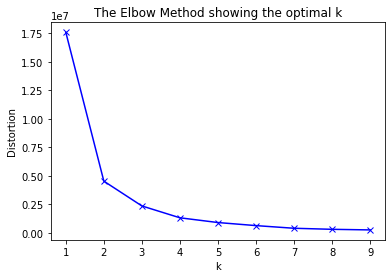

In [ ]:
#elbow method

distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_wine)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#Em relação a modelagem utilizando o Kmeans, marque a alternativa CORRETA sobre 
#a métrica Coeficiente de Silhueta, Davies-Bouldin Score e Mutual information

kmeans = KMeans(n_clusters=3) #porque é o número de clusters, como visto acima
kmeans.fit(x_treino_wine, y_treino_wine)
k_pred = kmeans.predict(x_teste_wine)
k_pred

array([1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2],
      dtype=int32)

In [ ]:
print('Silhouette Score:', silhouette_score(x_teste_wine, k_pred)) 
print('Davies-Bouldin Score:', davies_bouldin_score(x_teste_wine, k_pred))
print('Mutual Info Score:', mutual_info_score(y_teste_wine, k_pred))

Silhouette Score: 0.5581747258825842
Davies-Bouldin Score: 0.5316199338449925
Mutual Info Score: 0.42739927199674965
